Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). 



In [4]:
import pandas as pd


In [13]:
import matplotlib.pyplot as plt

In [63]:
movie = pd.read_csv('movie_metadata.csv')
movie_stats = movie.filter(items = ['director_name','movie_title','color', 'imdb_score', 'duration', 'budget', 'language','title_year','country', 'aspect_ratio'])
movie_barh = movie_stats.sort_values('imdb_score', ascending=False)
movie_barh

,director_name,movie_title,color,imdb_score,duration,budget,language,title_year,country,aspect_ratio
2765,John Blanchard,Towering Inferno,Color,9.5,65.0,NaN,English,NaN,Canada,1.33
1937,Frank Darabont,The Shawshank Redemption,Color,9.3,142.0,25000000.0,English,1994.0,USA,1.85
3466,Francis Ford Coppola,The Godfather,Color,9.2,175.0,6000000.0,English,1972.0,USA,1.85
4409,John Stockwell,Kickboxer: Vengeance,NaN,9.1,90.0,17000000.0,NaN,2016.0,USA,NaN
2824,NaN,Dekalog,Color,9.1,55.0,NaN,Polish,NaN,Poland,1.33
...,...,...,...,...,...,...,...,...,...,...
2268,Jason Friedberg,Disaster Movie,Color,1.9,88.0,25000000.0,English,2008.0,USA,1.85
2295,Bob Clark,Superbabies: Baby Geniuses 2,Color,1.9,88.0,20000000.0,English,2004.0,Germany,2.35
4605,A. Raven Cruz,The Helix... Loaded,Color,1.9,97.0,1000000.0,English,2005.0,USA,1.78
1136,Lawrence Kasanoff,Foodfight!,Color,1.7,91.0,65000000.0,English,2012.0,USA,NaN


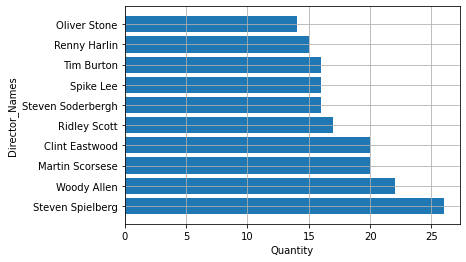

In [60]:
#График для того, чтобы узнать, у какого режиссера больше всего фильмов(выводятся 10 самых "продуктивных")
movies_barh = movie_barh.loc[:,'director_name'].value_counts().head(10)
movies_barh
plt.barh(movies_barh.index, movies_barh)
plt.xlabel('Quantity')
plt.ylabel('Director_Names')
plt.grid()

In [70]:
import seaborn as sns

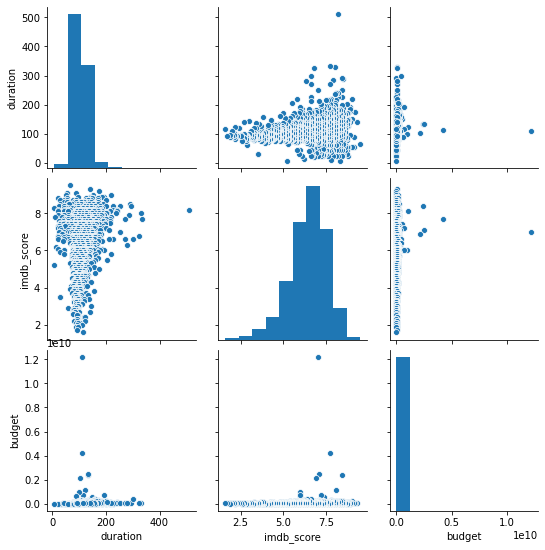

In [82]:
#Посмотрим, как работает функция sns и как взаимосвязаны между собой длительность фильма, бюджет и оценка пользователей
#К сожалению, нет полной информмации о бюджете каждого фильма - анализ не особо точен.
sns_plot = sns.pairplot(
    movie_barh[['duration', 'imdb_score', 'budget']])
sns_plot

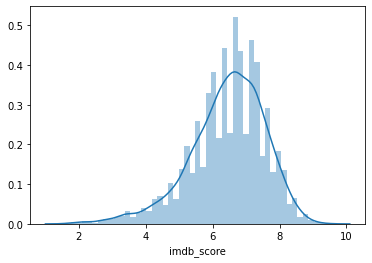

In [74]:
#Узнаем распределение оценок на imdb, можно сказать,что самая популярная оценка - около 6,8
sns.distplot(movie_barh.imdb_score)

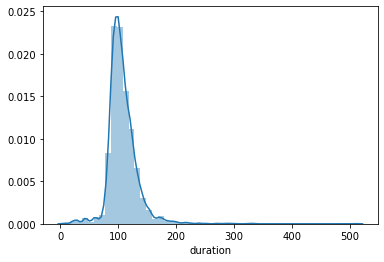

In [76]:
#Также узнаем про распределение длительностей фильмов. Средняя длительность - 1 час 45 минут
sns.distplot(movie_barh.duration)

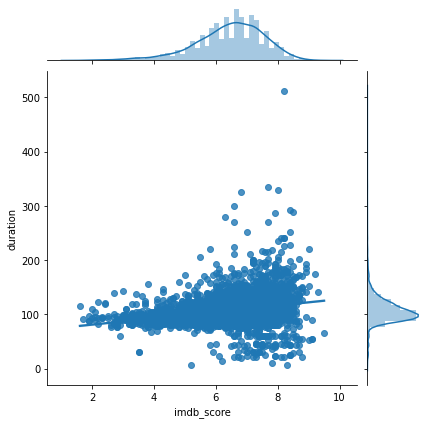

In [78]:
#Хотим узнать, есть ли зависимость между длительностью фильма и его оценкой. Спойлер: нет прямой корреляции. Режиссером не стоит укорачивать их или наоборот удлинять
sns.jointplot(x='imdb_score', y='duration', 
              data=movie_barh, kind='reg')

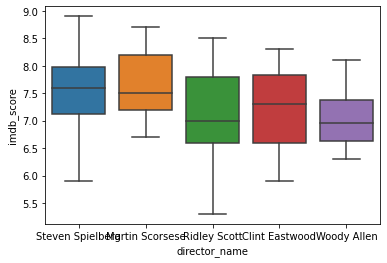

In [80]:
#Узнаем, какие оценки за фильмы, у самых "продуктивных" режиссеров. Можно заметить, что у некоторых режиссеров много фильмов - средняя их оценка довольно высока и даже провальных фильмов нет. А есть те, у кого есть провальные фильмы. 
#Вывод: даже при большом опыте - могут быть провалы!
top_director =movie_barh.director_name.value_counts().sort_values(ascending = False).head(5).index.values
top_director
ax = sns.boxplot(x="director_name", y="imdb_score", 
            data=movie_barh[movie_barh.director_name.isin(top_director)])